In [1]:
import numpy as np
import numpy.linalg
import numpy.random
import matplotlib.pyplot as plt

# 1.Полиномиальная регрессия

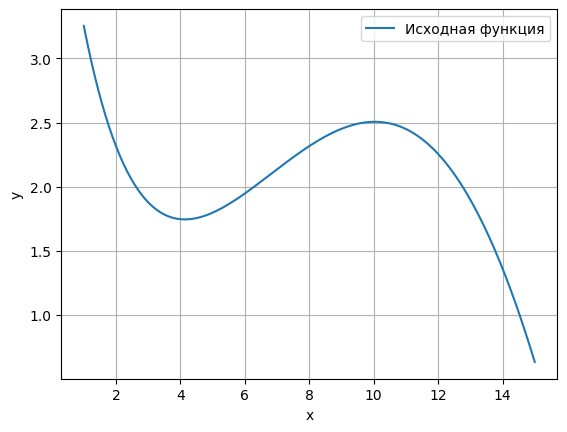

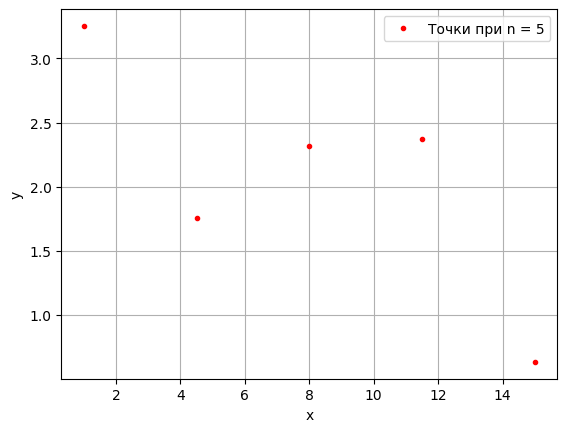

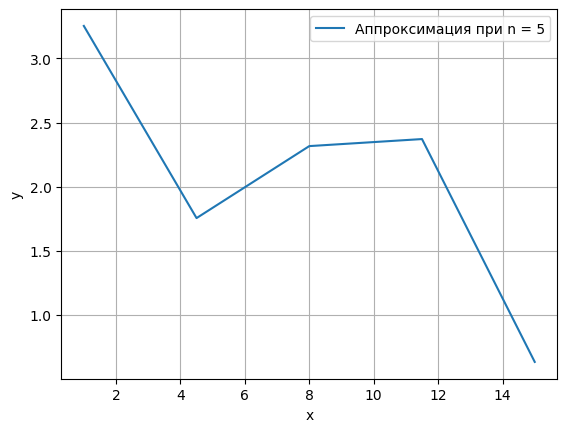

In [6]:
def f(x):
    return np.sin(x/5) * np.exp(x/10) + 5 * np.exp(-1/2 * x)


def approximation(n):
    a = np.linspace(1, 15, n)
    A = np.array([[x ** i for i in range(n)] for x in a])
    B = f(a)
    W = np.linalg.solve(A, B)
    answer = np.array([sum([W[i] * x**i for i in range(n)]) for x in a])
    return answer


xx = np.linspace(1, 15, 250)
n = 5
xx2 = np.linspace(1, 15, n)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xx, f(xx), label = 'Исходная функция')
plt.legend()
plt.show()

plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xx2, f(xx2), marker = '.', linestyle = '', label = f'Точки при n = {n}', color='red')
plt.legend()
plt.show()

plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xx2, approximation(n), label = f'Аппроксимация при n = {n}')
plt.legend()
plt.show()

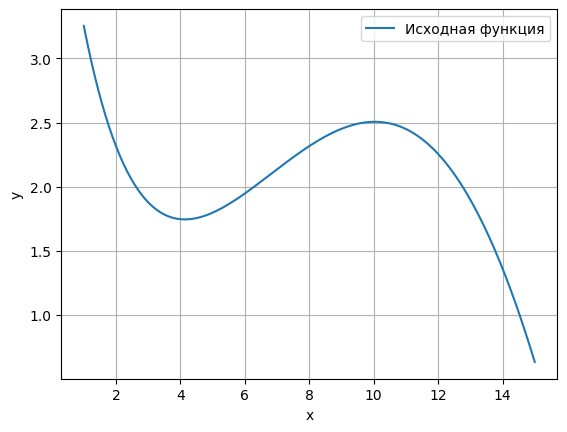

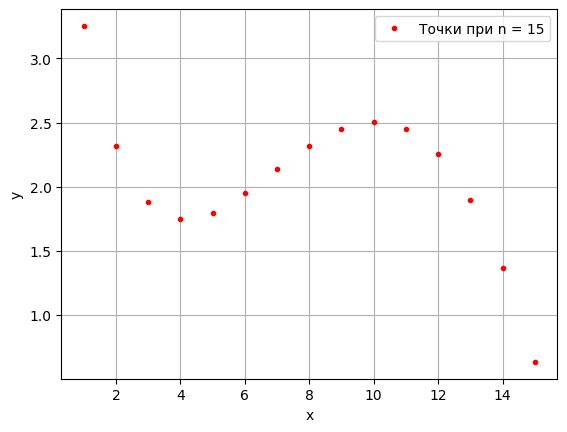

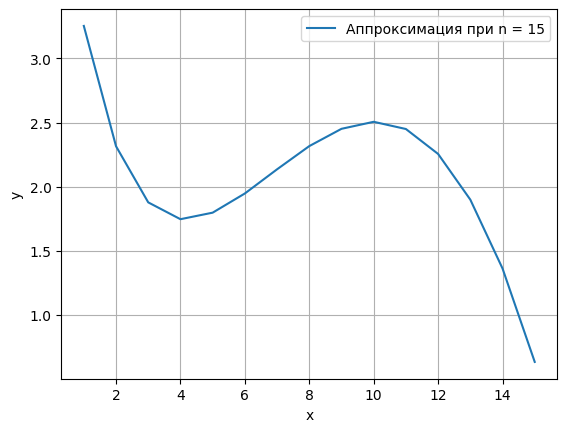

In [7]:
xx = np.linspace(1, 15, 250)
n = 15
xx2 = np.linspace(1, 15, n)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xx, f(xx), label = 'Исходная функция')
plt.legend()
plt.show()

plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xx2, f(xx2), marker = '.', linestyle = '', label = f'Точки при n = {n}', color='red')
plt.legend()
plt.show()

plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xx2, approximation(n), label = f'Аппроксимация при n = {n}')
plt.legend()
plt.show()

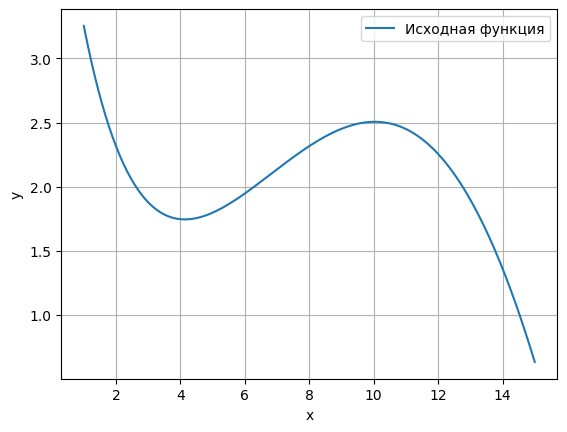

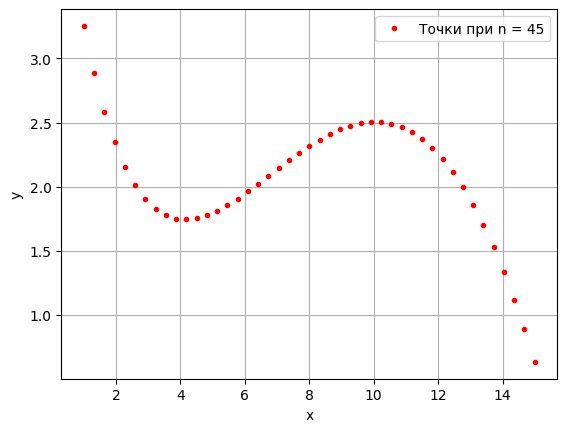

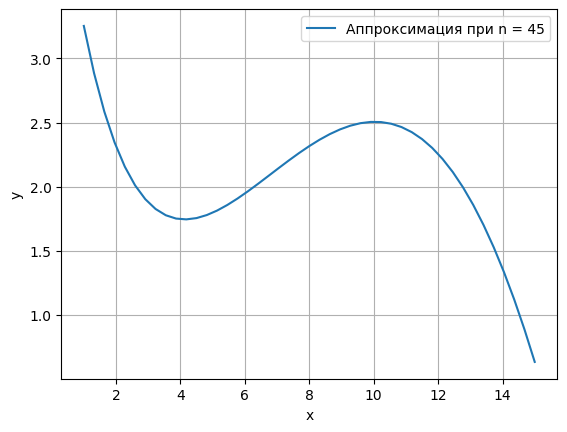

In [9]:
xx = np.linspace(1, 15, 250)
n = 45
xx2 = np.linspace(1, 15, n)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xx, f(xx), label = 'Исходная функция')
plt.legend()
plt.show()

plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xx2, f(xx2), marker = '.', linestyle = '', label = f'Точки при n = {n}', color='red')
plt.legend()
plt.show()

plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xx2, approximation(n), label = f'Аппроксимация при n = {n}')
plt.legend()
plt.show()

При увеличении степени полинома график становится более гладким

# 2.Полиномиальная регрессия с зашумлённым данными 

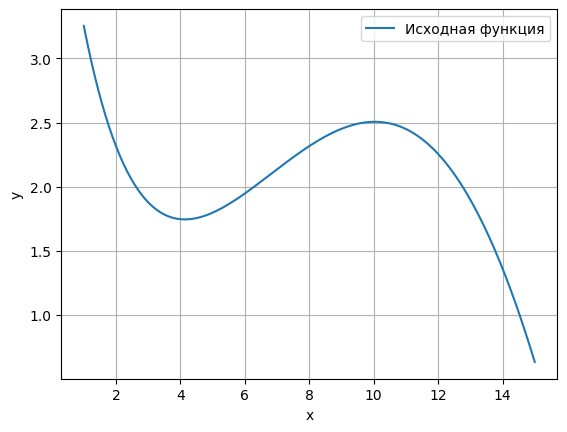

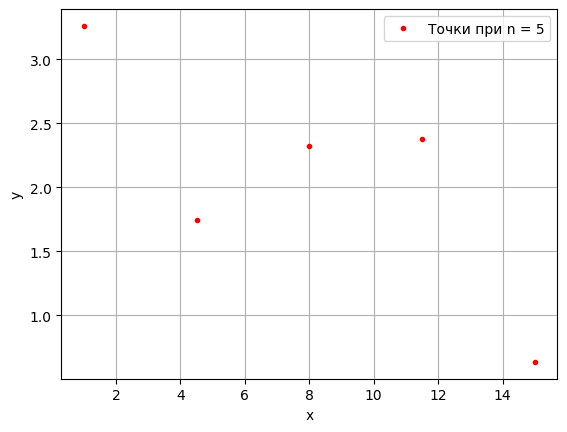

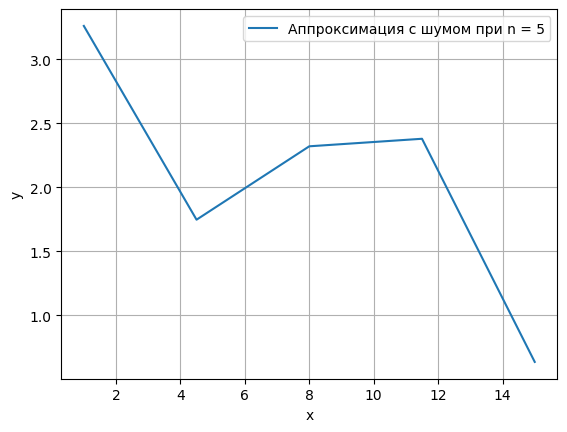

In [11]:
def noize_approximation(n):
    a = np.linspace(1, 15, n)
    A = np.array([[x ** i for i in range(n)] for x in a])
    B = f(a)
    for i in range(len(B)):
        B[i] += np.random.normal(0, 0.01)
    W = np.linalg.solve(A, B)
    answer = np.array([sum([W[i] * x**i for i in range(n)]) for x in a])
    return answer, B


xx = np.linspace(1, 15, 250)
n = 5
xx2 = np.linspace(1, 15, n)
yy = noize_approximation(n)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xx, f(xx), label = 'Исходная функция')
plt.legend()
plt.show()

plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xx2, yy[1], marker = '.', linestyle = '', label = f'Точки при n = {n}', color = 'red')
plt.legend()
plt.show()

plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xx2, yy[0], label = f'Аппроксимация с шумом при n = {n}')
plt.legend()
plt.show()

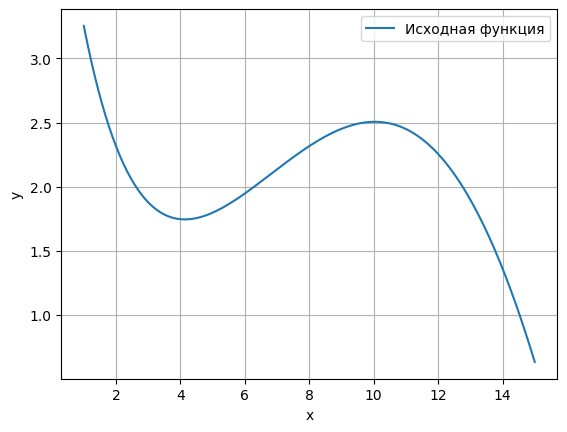

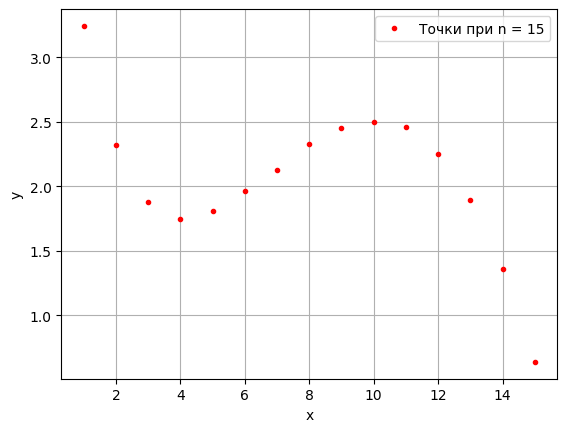

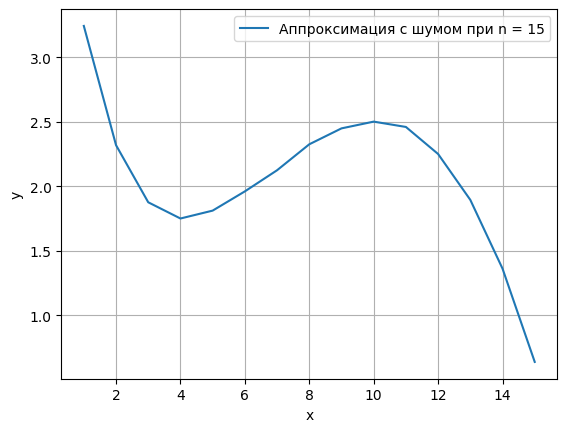

In [12]:
xx = np.linspace(1, 15, 250)
n = 15
xx2 = np.linspace(1, 15, n)
yy = noize_approximation(n)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xx, f(xx), label = 'Исходная функция')
plt.legend()
plt.show()

plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xx2, yy[1], marker = '.', linestyle = '', label = f'Точки при n = {n}', color = 'red')
plt.legend()
plt.show()

plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xx2, yy[0], label = f'Аппроксимация с шумом при n = {n}')
plt.legend()
plt.show()

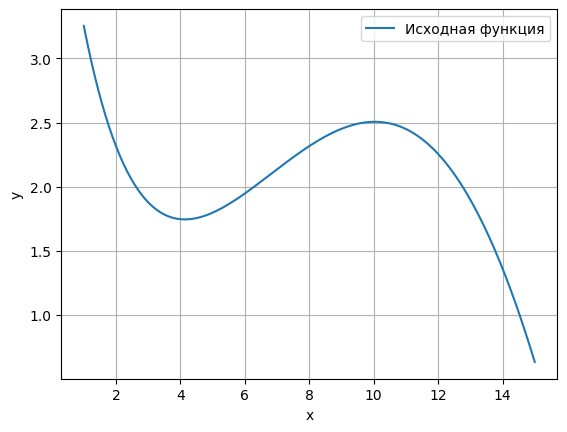

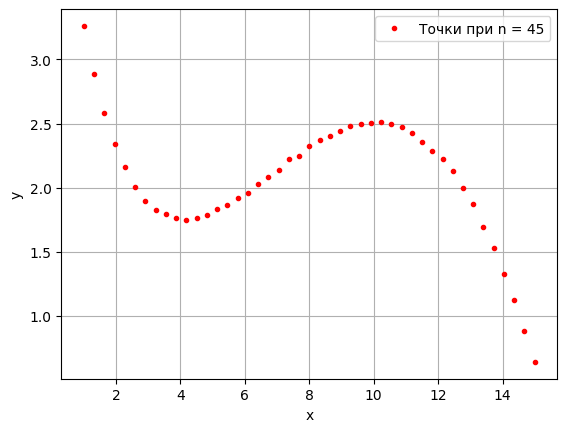

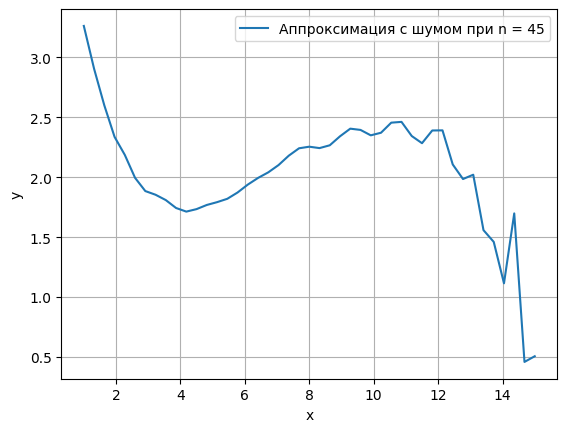

In [13]:
xx = np.linspace(1, 15, 250)
n = 45
xx2 = np.linspace(1, 15, n)
yy = noize_approximation(n)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xx, f(xx), label = 'Исходная функция')
plt.legend()
plt.show()

plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xx2, yy[1], marker = '.', linestyle = '', label = f'Точки при n = {n}', color = 'red')
plt.legend()
plt.show()

plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xx2, yy[0], label = f'Аппроксимация с шумом при n = {n}')
plt.legend()
plt.show()

При n = 5 аппроксимация получается ломанной, при n = 15 аппроксимация получается более удачной, но все еще не точной, а при n = 45 можно заметить, что полином слишком чувствителен к начальным данным.

# 3.Метод наименьших квадратов 

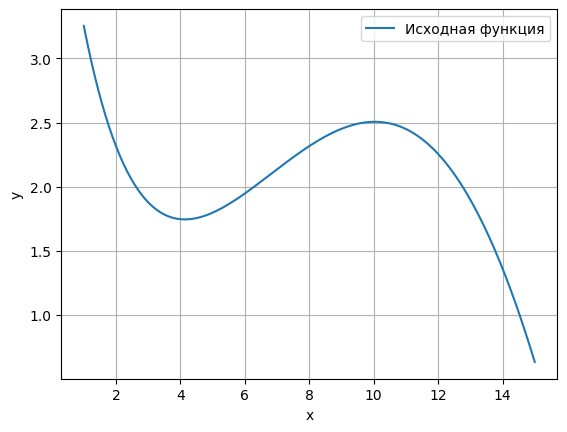

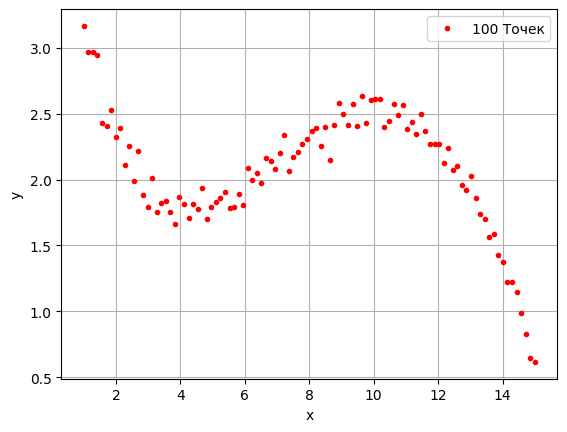

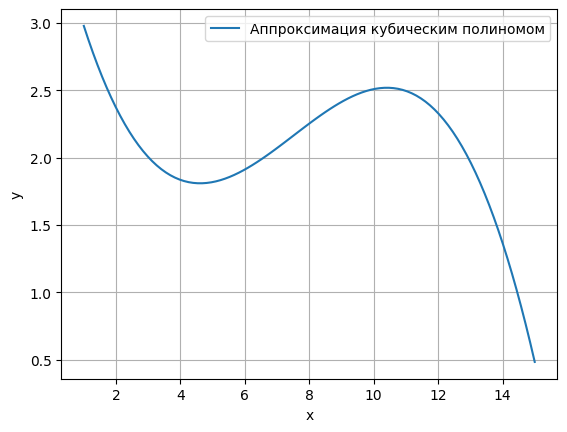

In [15]:
def f(x):
    return np.sin(x/5) * np.exp(x/10) + 5 * np.exp(-1/2 * x)


def least_squares(n):
    N = 100
    a = np.linspace(1, 15, N)
    A = np.array([[x ** i for i in range(n)] for x in a])
    B = f(a)
    for i in range(len(B)):
        B[i] += np.random.normal(0, 0.1)
    W, residuals, rank_A, singular_val_A = np.linalg.lstsq(A, B, rcond=None)
    answer = np.array([sum([W[i] * x**i for i in range(n)]) for x in a])
    return answer, B


xx = np.linspace(1, 15, 250)
N = 100
xx2 = np.linspace(1, 15, N)
n = 4 # так как полином степени n - 1 => если нужен кубический полином, то n = 4
yy = least_squares(n)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xx, f(xx), label = 'Исходная функция')
plt.legend()
plt.show()

plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xx2, yy[1], marker = '.', linestyle = '', label = f'100 Точек', color = 'red')
plt.legend()
plt.show()

plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xx2, yy[0], label = f'Аппроксимация кубическим полиномом')
plt.legend()
plt.show()

# Вывод
Исходя из графиков можно сделать вывод о том, что полиномиальная регрессия лучше подходит для аппроксимации больших n и отсутствии шума, в то время как метод наименьших квадратов более точен при маленьких n и большом уровне шума.